In [1]:
from smc import smc
from distribution import Normal, HalfNormal
import numpy as np
import matplotlib.pyplot as plt
import time
import pymc3 as pm
import arviz as az

## Gaussian Model

In [2]:
data = np.random.normal(0, 1, 100)
priors = [Normal(0., 1.), HalfNormal(5.)]

def prior_logp(values):
    logp = 0
    for idx, v in enumerate(values):
        logp += priors[idx].logp(v) 
    return logp

def likelihood_logp(values):
    return np.sum(Normal(*values).logp(data))

posterior = smc(prior_logp, priors, likelihood_logp, draws=1000, parallel=False)

Sample initial stage: ...
Stage: 0 Beta: 0.019 Steps: 25
Stage: 1 Beta: 0.060 Steps: 25
Stage: 2 Beta: 0.173 Steps: 25
Stage: 3 Beta: 0.555 Steps: 25
Stage: 4 Beta: 1.000 Steps: 25


(0.05691309129404967, 0.9955997426768692)

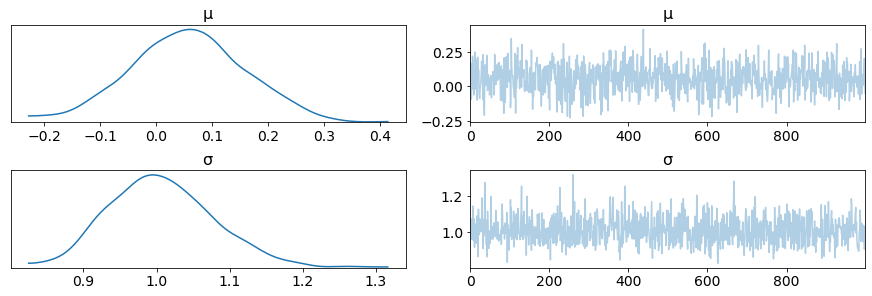

In [3]:
trace = {'μ':posterior[:,0], 'σ':posterior[:,1]}
az.plot_trace(trace);
np.mean(data), np.std(data)

## Linear Model

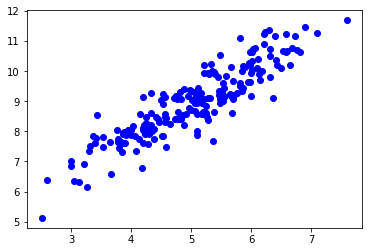

In [4]:
X = np.random.normal(5, 1, 200)
Y = np.random.normal(X+4, 0.5)
plt.plot(X, Y, 'bo');

In [5]:
#import pymc3 as pm
#with pm.Model() as model:
#    a = pm.Normal('a', 0, 1)
#    b = pm.Normal('b', 0, 1)
#    c = pm.HalfNormal('c', 1)
#    y = pm.Normal('y', a + b*X, sd=c, observed=Y)
#    trace = pm.sample_smc(1000, parallel=False)

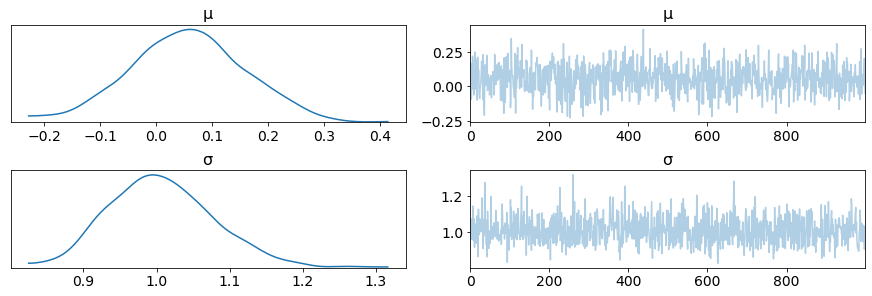

In [6]:
az.plot_trace(trace);

In [7]:
priors = [Normal(0., 1.), Normal(0., 1.), HalfNormal(1.)]

def prior_logp(values):
    logp = 0.
    for idx, v in enumerate(values):
        logp += priors[idx].logp(v) 
    return logp

def likelihood_logp(values):
    a = values[0]
    b = values[1]
    μ = a + b * X
    sd = values[2]
    return np.sum(Normal(μ, sd).logp(Y))

posterior = smc(prior_logp, priors, likelihood_logp, draws=1000, parallel=False)

Sample initial stage: ...
Stage: 0 Beta: 0.000 Steps: 25
Stage: 1 Beta: 0.001 Steps: 25
Stage: 2 Beta: 0.003 Steps: 25
Stage: 3 Beta: 0.014 Steps: 25
Stage: 4 Beta: 0.032 Steps: 25
Stage: 5 Beta: 0.059 Steps: 25
Stage: 6 Beta: 0.100 Steps: 25
Stage: 7 Beta: 0.176 Steps: 25
Stage: 8 Beta: 0.343 Steps: 25
Stage: 9 Beta: 0.720 Steps: 25
Stage: 10 Beta: 1.000 Steps: 25


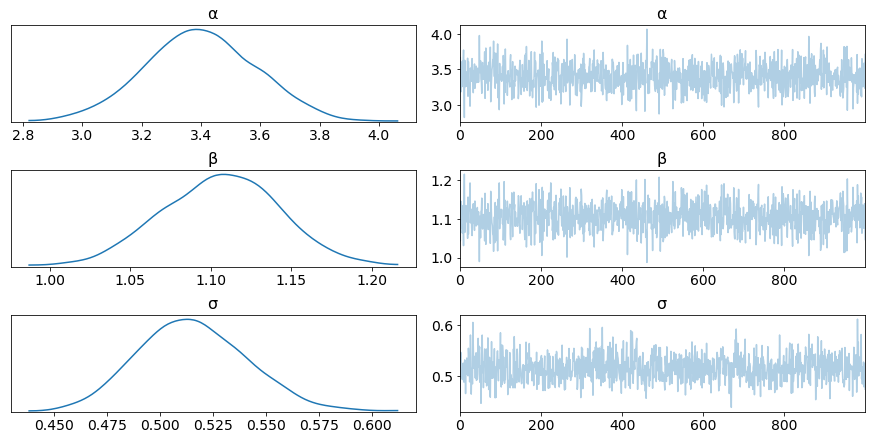

In [8]:
trace = {'α':posterior[:,0], 'β':posterior[:,1], 'σ':posterior[:,2]}
az.plot_trace(trace);

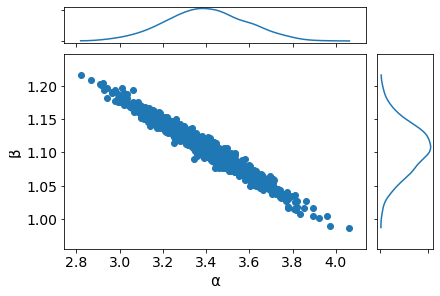

In [9]:
az.plot_joint(trace, var_names=['α', 'β']);

## Hierarchical Linear Model

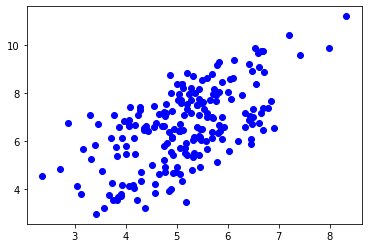

In [10]:
X = np.random.normal(5, 1, 200)
idx = np.repeat(range(4), 50)
Y = np.random.normal(X + idx, 0.5)
plt.plot(X, Y, 'bo');

In [16]:
def prior_logp(values):
    v0, v1, v2, v3, v4_0, v4_1, v4_2, v4_3, v5_0, v5_1, v5_2, v5_3, v6 = values
    logp = (Normal(0., 20.).logp(v0) +   # mu_a
            Normal(0., 5.).logp(v1) +    # mu_b
            HalfNormal(2.).logp(v2) +    # sd_a
            HalfNormal(2.).logp(v3) +    # sd_b
            Normal(v0, v2).logp(v4_0) +  # a_0
            Normal(v0, v2).logp(v4_1) +  # a_1
            Normal(v0, v2).logp(v4_2) +  # a_2
            Normal(v0, v2).logp(v4_3) +  # a_3
            Normal(v1, v3).logp(v5_0) +  # b_0
            Normal(v1, v3).logp(v5_1) +  # b_1
            Normal(v1, v3).logp(v5_2) +  # b_2
            Normal(v1, v3).logp(v5_3) +  # b_3
            HalfNormal(2.).logp(v6))     # sd 
    return logp

priors = ([Normal(0., 20.), Normal(0., 5.)] +  # mu_a, mu_b
          [HalfNormal(2.)] * 2 +               # sd_a, sd_b
          [Normal(0., 20.)] * 4 +              # a
          [Normal(0., 5.)] * 4 +              # b
          [HalfNormal(2.)])                    # sd


def likelihood_logp(values):
    *_, v4_0, v4_1, v4_2, v4_3, v5_0, v5_1, v5_2, v5_3, v6 = values
    a = np.array((v4_0, v4_1, v4_2, v4_3))
    b = np.array((v5_0, v5_1, v5_2, v5_3))
    μ = a[idx] + b[idx] * X
    sd = v6
    return np.sum(Normal(μ, sd).logp(Y))

posterior = smc(prior_logp, priors, likelihood_logp, draws=2000)

Sample initial stage: ...
Stage: 0 Beta: 0.000 Steps: 25
Stage: 1 Beta: 0.000 Steps: 25
Stage: 2 Beta: 0.000 Steps: 25
Stage: 3 Beta: 0.001 Steps: 25
Stage: 4 Beta: 0.001 Steps: 25
Stage: 5 Beta: 0.003 Steps: 25
Stage: 6 Beta: 0.005 Steps: 25
Stage: 7 Beta: 0.009 Steps: 25
Stage: 8 Beta: 0.015 Steps: 25
Stage: 9 Beta: 0.024 Steps: 25
Stage: 10 Beta: 0.036 Steps: 25
Stage: 11 Beta: 0.048 Steps: 25
Stage: 12 Beta: 0.060 Steps: 25
Stage: 13 Beta: 0.074 Steps: 25
Stage: 14 Beta: 0.091 Steps: 25
Stage: 15 Beta: 0.111 Steps: 25
Stage: 16 Beta: 0.135 Steps: 25
Stage: 17 Beta: 0.162 Steps: 25
Stage: 18 Beta: 0.195 Steps: 25
Stage: 19 Beta: 0.240 Steps: 25
Stage: 20 Beta: 0.303 Steps: 25
Stage: 21 Beta: 0.392 Steps: 25
Stage: 22 Beta: 0.518 Steps: 25
Stage: 23 Beta: 0.698 Steps: 25
Stage: 24 Beta: 0.942 Steps: 25
Stage: 25 Beta: 1.000 Steps: 25


/home/osvaldo/proyectos/00_PyMC3/arviz/arviz/plots/kdeplot.py:293: UserWarning: kde plot failed, you may want to check your data
  warnings.warn("kde plot failed, you may want to check your data")
/home/osvaldo/proyectos/00_PyMC3/arviz/arviz/plots/kdeplot.py:293: UserWarning: kde plot failed, you may want to check your data
  warnings.warn("kde plot failed, you may want to check your data")
/home/osvaldo/proyectos/00_PyMC3/arviz/arviz/plots/kdeplot.py:293: UserWarning: kde plot failed, you may want to check your data
  warnings.warn("kde plot failed, you may want to check your data")
/home/osvaldo/proyectos/00_PyMC3/arviz/arviz/plots/kdeplot.py:293: UserWarning: kde plot failed, you may want to check your data
  warnings.warn("kde plot failed, you may want to check your data")
/home/osvaldo/proyectos/00_PyMC3/arviz/arviz/plots/kdeplot.py:293: UserWarning: kde plot failed, you may want to check your data
  warnings.warn("kde plot failed, you may want to check your data")


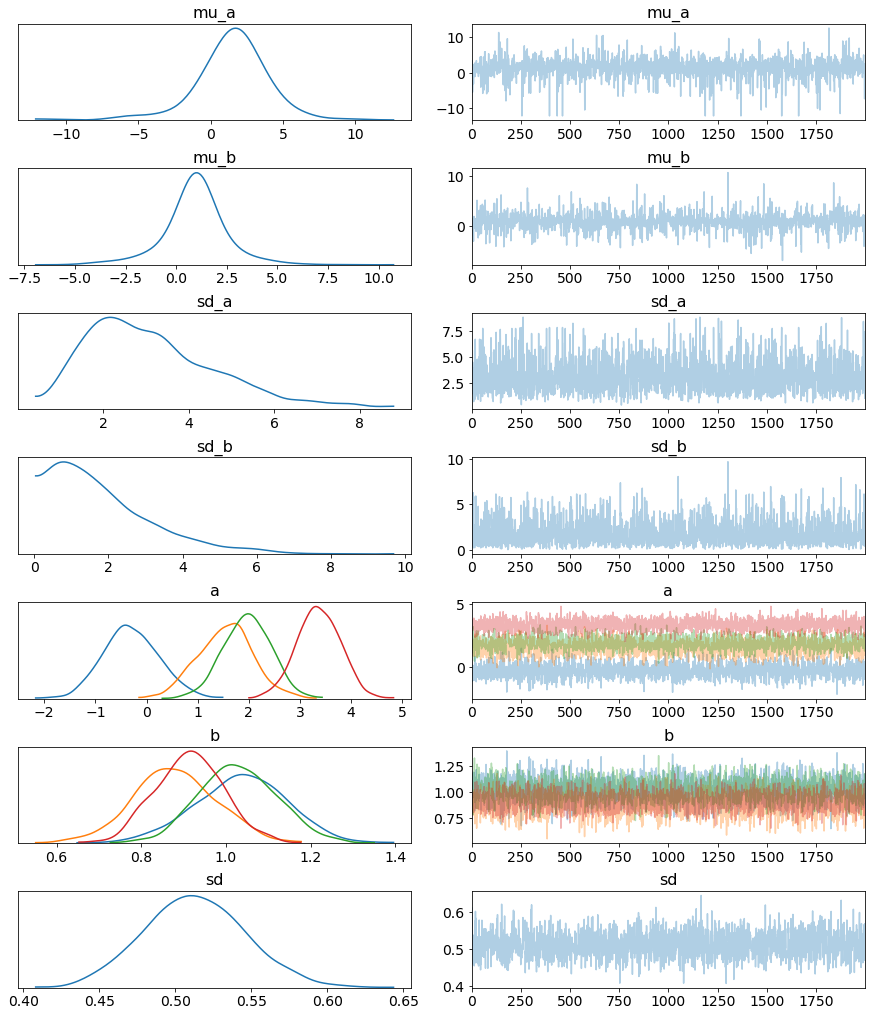

In [17]:
trace = {'mu_a':posterior[:,0], 
         'mu_b':posterior[:,1],
         'sd_a':posterior[:,2],
         'sd_b':posterior[:,3],
         'a': posterior[:,4:8].T,
         'b': posterior[:,8:12].T,       
         'sd': posterior[:,12]}
az.plot_trace(trace);

In [13]:
with pm.Model() as model:
    mu_a = pm.Normal('mu_a', 0, 10.)
    mu_b = pm.Normal('mu_b', 0, 10.) 
    sd_a = pm.HalfNormal('sd_a', 5)
    sd_b = pm.HalfNormal('sd_b', 5)
    
    a = pm.Normal('a', mu_a, sd_a, shape=4)
    b = pm.Normal('b', mu_b, sd_b, shape=4)
    c = pm.HalfNormal('c', 1)
    y = pm.Normal('y', a[idx] + b[idx]*X, sd=c, observed=Y)
    #trace = pm.sample_smc(1000, parallel=False)
    trace = pm.sample(1000)
    #trace = pm.sample_prior_predictive(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [c, b, a, sd_b, sd_a, mu_b, mu_a]
Sampling 2 chains, 100 divergences: 100%|██████████| 3000/3000 [00:14<00:00, 212.28draws/s]
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
There were 80 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


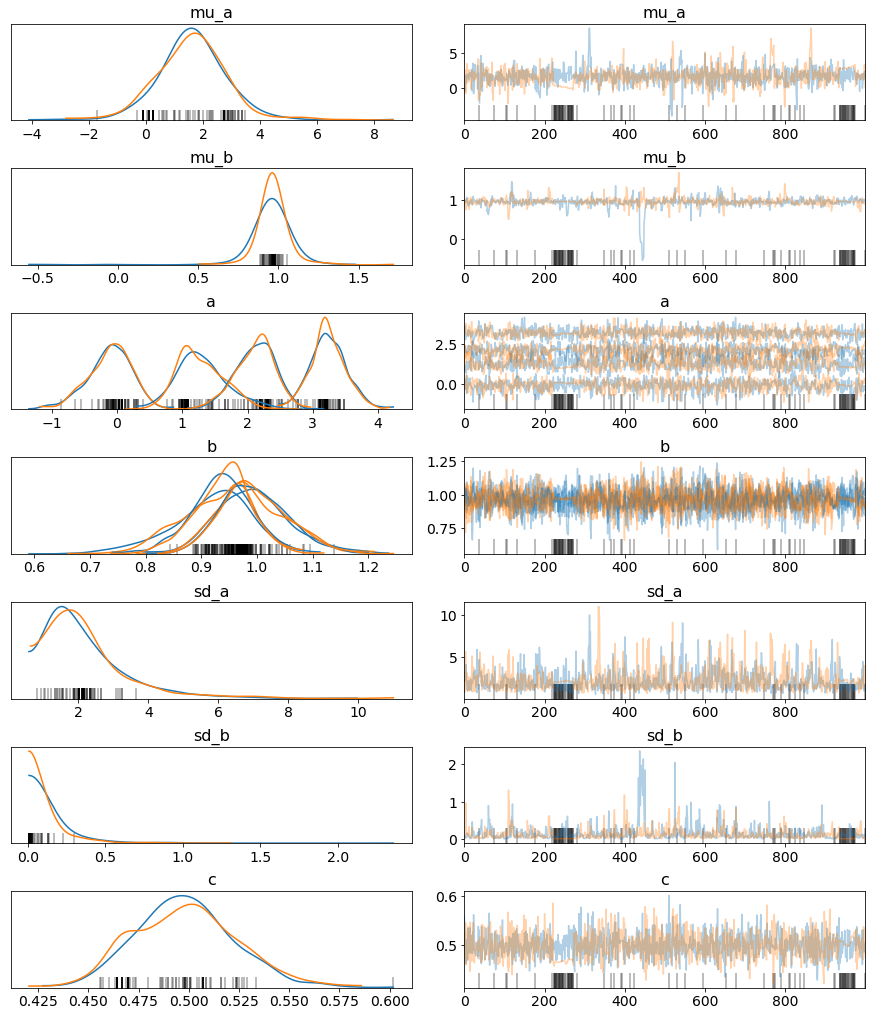

In [14]:
az.plot_trace(trace, compact=True);